In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


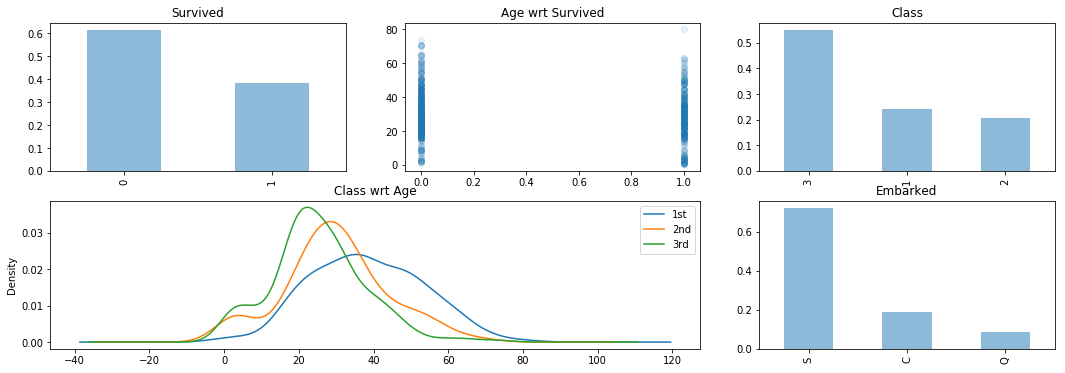

In [3]:

fig=plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age,alpha=0.1)
plt.title("Age wrt Survived")

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Class")

plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Age")
plt.legend(("1st","2nd","3rd"))


plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Embarked")

plt.show()

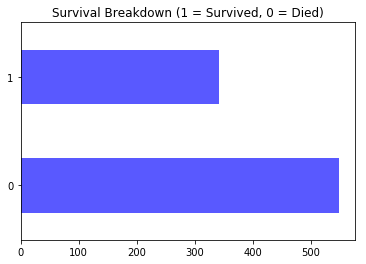

In [4]:
plt.figure(figsize=(6,4))

df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")
plt.show()


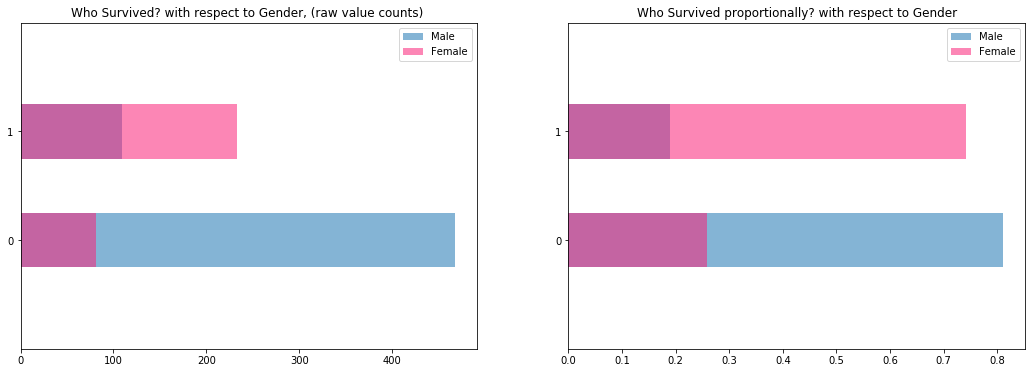

In [5]:
fig = plt.figure(figsize=(18,6))
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()
ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

plt.show()

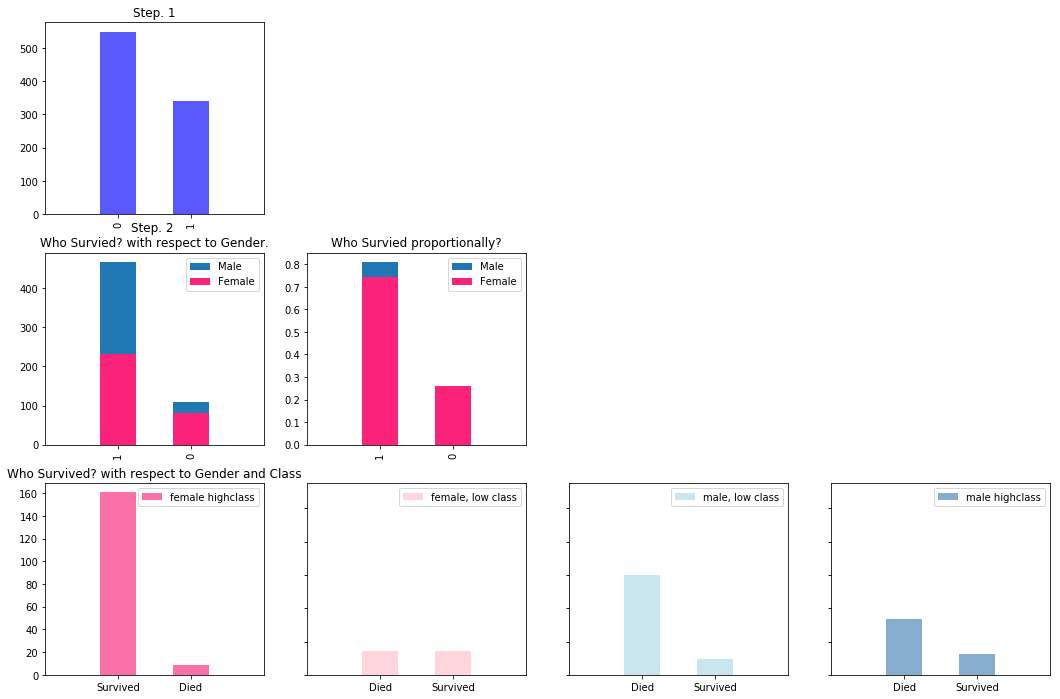

In [6]:
fig = plt.figure(figsize=(18,12))
a=0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')


ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')

# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

In [7]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    
    targets = train.Survived
    train.drop('Survived', 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined



In [8]:
combined = get_combined_data()

In [9]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [10]:
get_titles()

In [11]:
combined.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [12]:

#grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
#grouped_median_train = grouped_train.median()

#grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
#grouped_median_test = grouped_test.median()

In [13]:
#grouped_median_train



In [14]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [15]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [16]:
grouped_median_test


PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [17]:
import numpy as np
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    


In [18]:
process_age()

/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [20]:
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)

In [21]:
process_names()

In [22]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [23]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)
    

In [24]:
process_fares()

/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)

In [26]:
process_embarked()


/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})

In [28]:
process_sex()

In [29]:
combined

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,5,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1
5,6,3,1,26.0,0,0,330877,8.4583,NaN,0,0,1,0,0,0,0,1,0
6,7,1,1,54.0,0,0,17463,51.8625,E46,0,0,1,0,0,0,0,0,1
7,8,3,1,2.0,3,1,349909,21.0750,NaN,1,0,0,0,0,0,0,0,1
8,9,3,0,27.0,0,2,347742,11.1333,NaN,0,0,0,1,0,0,0,0,1
9,10,2,0,14.0,1,0,237736,30.0708,NaN,0,0,0,1,0,0,1,0,0


In [30]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)


In [31]:
process_family()

In [32]:
del combined['Cabin']
del combined['Ticket']

In [33]:
combined

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,2,0,1,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,2,0,1,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,2,0,1,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,1,1,0,0
5,6,3,1,26.0,0,0,8.4583,0,0,1,0,0,0,0,1,0,1,1,0,0
6,7,1,1,54.0,0,0,51.8625,0,0,1,0,0,0,0,0,1,1,1,0,0
7,8,3,1,2.0,3,1,21.0750,1,0,0,0,0,0,0,0,1,5,0,0,1
8,9,3,0,27.0,0,2,11.1333,0,0,0,1,0,0,0,0,1,3,0,1,0
9,10,2,0,14.0,1,0,30.0708,0,0,0,1,0,0,1,0,0,2,0,1,0


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ninjakx/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [36]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets


In [37]:
train, test, targets = recover_train_test_target()


In [38]:
print(train.shape)
#print(test)
print(test.shape)
print(targets.shape)

(891, 20)
(418, 20)
(891,)


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [40]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [41]:
features.sort_values(['importance'],ascending=False)


,feature,importance
0,PassengerId,0.163120
6,Fare,0.153835
9,Title_Mr,0.142664
3,Age,0.135175
2,Sex,0.108025
1,Pclass,0.080426
8,Title_Miss,0.030658
10,Title_Mrs,0.028193
19,LargeFamily,0.025732
18,SmallFamily,0.020340


In [42]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape


(891, 6)

In [43]:
test_new = model.transform(test)
test_new.shape

(418, 6)

In [44]:
################ Using ANN #########################

In [45]:
trainData = train_new
testData = test_new
trainLabels = targets

In [46]:
import os,sys
from scipy.special import expit
import numpy as np

def _sigmoid(z):
    """Compute logistic function (sigmoid)
    Uses scipy.special.expit to avoid overflow
    error for very small input values z.
    """
    # return 1.0 / (1.0 + np.exp(-z))
    return expit(z)

def _sigmoid_gradient(z):
    """Compute gradient of the logistic function"""
    sg = _sigmoid(z)
    return sg * (1.0 - sg)

class MLP(object):
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001,
                 alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    def _encode_labels(self, y, k):

        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[int(val), idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0,
                               size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,
                               size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2


    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):

        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = _sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = _sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) +
                                np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() +
                                np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):

        term1 = -y_enc * (np.log(output))
        term2 = (1.0 - y_enc) * np.log(1.0 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):

        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * _sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += self.l2 * w1[:, 1:]
        grad1[:, 1:] += self.l1 * np.sign(w1[:, 1:])
        grad2[:, 1:] += self.l2 * w2[:, 1:]
        grad2[:, 1:] += self.l1 * np.sign(w2[:, 1:])

        return grad1, grad2

    def predict(self, X):  
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
     
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx],
                                                       self.w1,
                                                       self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self
    

In [47]:
# initialization
nn = MLP(n_output=10, 
                  n_features=trainData.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)
nn

In [48]:
# training
nn.fit(trainData, trainLabels, print_progress=True)

Epoch: 1000/1000

In [49]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_array = np.array(nn.cost_)
cost_averages = [np.mean(cost_array[i]) for i in batches]

In [50]:
y_train_pred = nn.predict(trainData)
accuracy = \
  ((np.sum(trainLabels == y_train_pred, axis=0)).astype('float') / trainData.shape[0])
accuracy

0.69360269360269355

In [51]:
y_test_pred = nn.predict(testData)
#print(y_test_pred.shape)
########## Giving less accuracy as compared to random forest technique ###########

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV


In [58]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8035914702581369
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}


In [59]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output1.csv',index=False)